In [1]:
# Getting Data
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from fastai import *
from fastai.vision.all import *

In [3]:
#!download and unzip https://www.dropbox.com/s/u83ae1efaah2w9o/UCMercedLanduse.zip
# transform txt to csv with reformatting fields in Excel
df = pd.read_csv(r"D:\python_projects\Multi-label Cover\UCMerced\multilabels.csv", sep="\t")
df.head()

,IMAGE,labels,is_valid
0,agricultural00.tif,field trees,True
1,agricultural01.tif,field,True
2,agricultural02.tif,field,True
3,agricultural03.tif,field,True
4,agricultural04.tif,trees,True


In [4]:
#Training
path = Path (r"D:\python_projects\Multi-label Cover\UCMerced\images")
files =get_image_files(path)
len(files)

2100

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


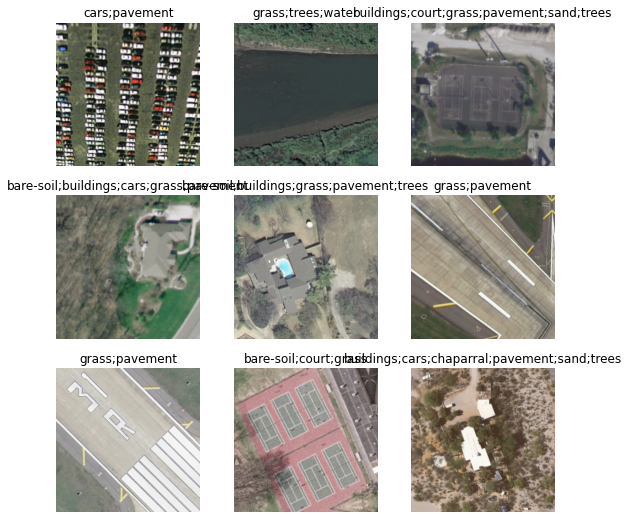

In [5]:
dls = ImageDataLoaders.from_df(df, path, valid_col='is_valid', label_delim=' ',
                               item_tfms=Resize(256), batch_tfms=aug_transforms(size=256))
dls.show_batch()

In [6]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

SuggestedLRs(valley=0.002511886414140463)

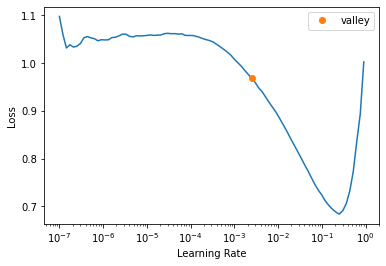

In [7]:
learn.lr_find()
# Finetuning doesn't work: learn.fine_tune(2, 3e-3)

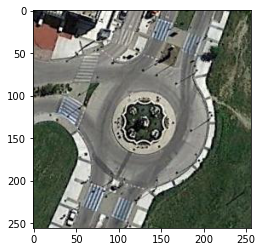

In [8]:
# Prediction
# download and unzip https://www.dropbox.com/s/6tt0t61uq2w1n3s/test.zip
img = mpimg.imread(r"D:\python_projects\Multi-label Cover\UCMerced\test\roundabout_086.jpg")
imgplot = plt.imshow(img)
plt.show()

In [9]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

(#5) ['buildings','court','field','tanks','trees']

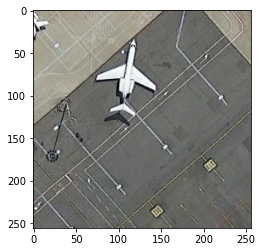

In [10]:
img = mpimg.imread(r"D:\python_projects\Multi-label Cover\UCMerced\test\airplane_439.jpg")
imgplot = plt.imshow(img)
plt.show()

In [11]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

(#6) ['bare-soil','buildings','court','field','grass','trees']

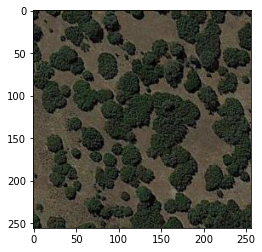

In [12]:
img = mpimg.imread(r"D:\python_projects\Multi-label Cover\UCMerced\test\chaparral_121.jpg")
imgplot = plt.imshow(img)
plt.show()

In [13]:
learn.predict(img)
pred_class

(#6) ['bare-soil','buildings','court','field','grass','trees']